In [58]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score
from sklearn.model_selection import cross_val_score

In [59]:
# Dataset from https://www.kaggle.com/jessemostipak/hotel-booking-demand

df = pd.read_csv('./Data/hotel_bookings.csv')

In [60]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [62]:
# Converting string values into ints

In [63]:
# Converting hotel types from str to int

df.hotel = df.hotel.map({'City Hotel':0, 'Resort Hotel':1})
df.hotel.unique()

array([1, 0], dtype=int64)

In [64]:
# Converting month from str to int

df.arrival_date_month = df.arrival_date_month.map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September': 9, 'October':10, 'November':11, 'December':12})

In [65]:
# Creating a timeseries date and extraction of weekdays

df['date'] = pd.to_datetime(df['arrival_date_year'].map(str) + '-' + df['arrival_date_month'].map(str) + '-' + df['arrival_date_day_of_month'].map(str))

In [66]:
df['weekday'] = df['date'].dt.weekday

In [67]:
df.meal.unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [68]:
# Converting meal from str to int
df.meal = df.meal.map({'Undefined':0, 'BB':1, 'HB':2, 'FB':3, 'SC':4})

df.meal.unique()

array([1, 3, 2, 4, 0], dtype=int64)

In [69]:
# Converting country from str to int using LabelEncoder

df.country.fillna(df.country.mode().to_string(), inplace=True)    # Filling Null values with the most common value in the dataset for the LabelEncoder
le = LabelEncoder()
df.country = le.fit_transform(df.country)
df.country.unique()

array([136,  60, 170,  52,  77,  57,   0, 140, 125, 128,   7, 134,  44,
        16,  30,  35,  67,  82, 124,  47, 141, 155,  12,  53,  43,  26,
        55, 114,  28, 101, 154,   4,  76,  32, 108, 104, 167, 149, 102,
       135, 150,  31,  13,  24, 100, 163, 175,   2,  81,  41, 176,  38,
       177,  49,  92,  39,  73,   6, 162,  83,  72,  70,  78,  61,   5,
        64, 169,  84,  29,  42,  36,  62,  93, 122, 107, 172, 153,  56,
        87, 129,  74,  95, 132, 145, 156,  14,  21, 127, 159,  48, 109,
       118,   8,  86,  99,  40,  34,  23, 116,  37, 152, 166,  20,  33,
        85, 157, 146,  15, 143, 174, 133, 139,  51, 131, 111, 117,  50,
       106,  80, 171, 126,  22, 103, 158, 164,  45, 151,  91,  54,  79,
        71, 142,  89, 105,  19,  75, 160, 123,  17, 173, 165,  59,  63,
       161,  65,  88,  98,  66, 113, 168, 119,  58, 112, 130,  18,  96,
       110, 120,  25, 137,  27,   1,   3, 148,  46, 138,  69,  97,  10,
        68,   9, 115, 121,  90, 144,  11, 147,  94])

In [70]:
df.market_segment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [71]:
# Converting market_segment from str to int

le = LabelEncoder()
df['market_segment'] = le.fit_transform(df['market_segment'])
df.market_segment.unique()

array([3, 2, 6, 5, 1, 4, 7, 0])

In [72]:
df.distribution_channel.unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [73]:
# Converting distribution_channel from str to int

df.distribution_channel = df.distribution_channel.map({'Undefined':0, 'Direct':1, 'Corporate':2, 'TA/TO':3, 'GDS':4})
df.distribution_channel.unique()

array([1, 2, 3, 0, 4], dtype=int64)

In [74]:
df.reserved_room_type.unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [75]:
df.assigned_room_type.unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [76]:
# Creating a new feature: room. 
# If a guest does not get the reserved room it might raise the probability that she cancels the reservation.

df['room'] = 0
df.loc[df.reserved_room_type == df.assigned_room_type , 'room'] = 1

In [77]:
# Converting reserved_room_type from str to int

le = LabelEncoder()
df['reserved_room_type'] = le.fit_transform(df['reserved_room_type'])
df.reserved_room_type.unique()

array([2, 0, 3, 4, 6, 5, 7, 8, 9, 1])

In [78]:
# Converting assigned_room_type from str to int

le = LabelEncoder()
df['assigned_room_type'] = le.fit_transform(df['assigned_room_type'])
df.assigned_room_type.unique()

array([ 2,  0,  3,  4,  6,  5,  8,  1,  7, 11, 10,  9])

In [79]:
# Creating a new column: net_cancelled. It contains 1 if the guest has cancelled more bookings in the past than the number of booking she did not cancel, otherwise 0

df['net_cancelled'] = 0
df.loc[ df.previous_cancellations > df.previous_bookings_not_canceled, 'net_cancelled'] = 1


In [80]:
df.deposit_type.unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [81]:
# Converting deposit_type from str to int

df.deposit_type = df.deposit_type.map({'No Deposit':0, 'Refundable':1, 'Non Refund':2})
df.deposit_type.unique()

array([0, 1, 2], dtype=int64)

In [82]:
df.customer_type.unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [83]:
# Converting customer_type from str to int

df.customer_type = df.customer_type.map({'Transient':1, 'Transient-Party':2, 'Contract':3, 'Group':4})
df.customer_type.unique()

array([1, 3, 2, 4], dtype=int64)

In [84]:
df.reservation_status.unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [85]:
# Converting reservation_status from str to int

df.reservation_status = df.reservation_status.map({'No-Show':0, 'Check-Out':1, 'Canceled':2})
df.reservation_status.unique()

array([1, 2, 0], dtype=int64)

In [86]:
df.required_car_parking_spaces.unique()

array([0, 1, 2, 8, 3], dtype=int64)

In [87]:
# Filling missing values in children with the mean
df.children.fillna(round(df.children.mean()), inplace = True)

# Filling missing values with 0
df[['agent', 'company']] = df[['agent', 'company']].fillna(0)

# Converting unneccessary float types into int types
df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')

In [88]:
# Adults, babies and children cant be 0 at same time, so these 180 rows need to be dropped

df = df.drop(df[(df.adults+df.babies+df.children)==0].index)

<AxesSubplot:>

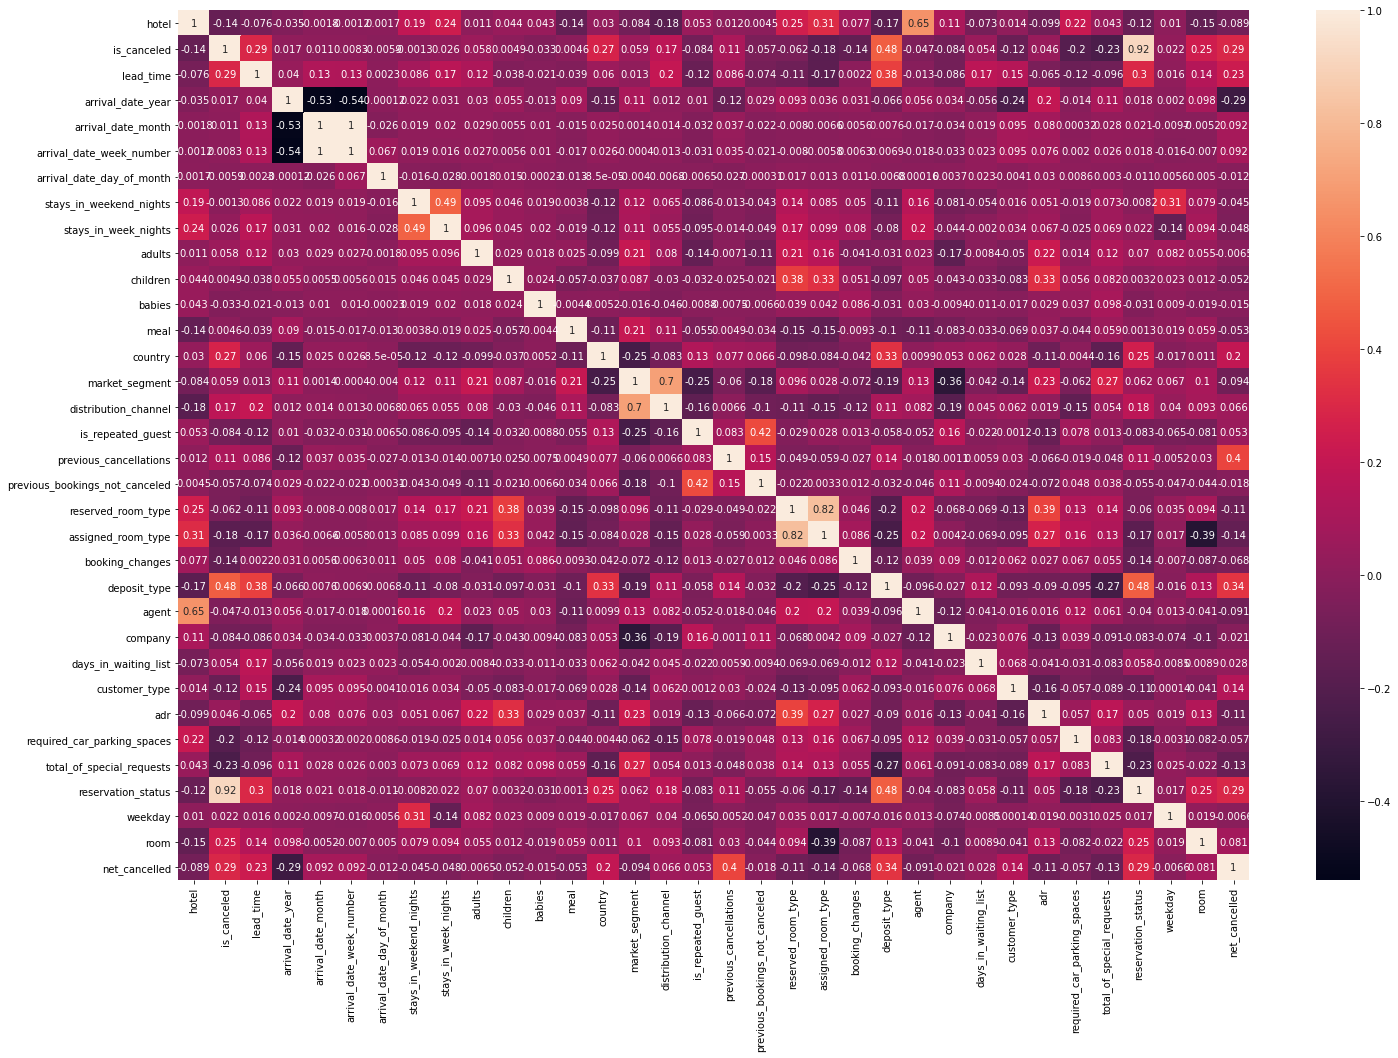

In [89]:
fig, ax = plt.subplots(figsize=(24, 16)) 
sns.heatmap(df.corr(), annot=True, ax = ax)

In [90]:
#Variance of the data
df.var()

hotel                                 0.223085
is_canceled                           0.233300
lead_time                         11422.361808
arrival_date_year                     0.500535
arrival_date_month                    9.546842
arrival_date_week_number            184.990111
arrival_date_day_of_month            77.107192
stays_in_weekend_nights               0.990258
stays_in_week_nights                  3.599010
adults                                0.330838
children                              0.159070
babies                                0.009508
meal                                  0.801927
country                            2023.411409
market_segment                        1.602172
distribution_channel                  0.458395
is_repeated_guest                     0.030507
previous_cancellations                0.713887
previous_bookings_not_canceled        2.244415
reserved_room_type                    2.874866
assigned_room_type                    3.476675
booking_chang

In [91]:
# Correlation depending on is_canceled
df.corr()['is_canceled'].abs().sort_values(ascending = False)

is_canceled                       1.000000
reservation_status                0.917176
deposit_type                      0.480483
net_cancelled                     0.292888
lead_time                         0.292876
country                           0.272496
room                              0.246768
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
assigned_room_type                0.175843
distribution_channel              0.171416
booking_changes                   0.144832
hotel                             0.137082
customer_type                     0.122024
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
reserved_room_type                0.062216
market_segment                    0.059419
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
agent                             0.046770
adr        

In [92]:
# vals = [0.005, 0.008, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.15, 0.2]
# y = df['is_canceled']

# # Preparing empty lists for next loop
# val_list, features_list, accuracy_dt_list, kappa_dt_list, accuracy_rf_list, kappa_rf_list, accuracy_xgb_list, kappa_xgb_list = [], [], [], [], [], []
# accuracy_cat_list, kappa_cat_list, accuracy_etc_list, kappa_etc_list = [], [], [], []

# # Loop for automatic prediction using the best found methods for this dataset: Random Forest, XgBoost, Cat, Extra Trees
# for val in vals:
#     features = abs(df.corr()['is_canceled'][abs(df.corr()['is_canceled']) > val]).drop(['is_canceled', 'reservation_status']).index.tolist()

#     # Storing values of val and features per loop
#     val_list.append(val)
#     features_list.append(features)

#     # X = df.drop(columns = ['is_canceled', 'reservation_status', 'date'])
#     X = df
#     X = X[features]

#     X_scaled = StandardScaler().fit_transform(X)
#     X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 4)
    
#     # Decision Tree
#     model_dt = tree.DecisionTreeClassifier().fit(X_train, y_train)
#     model_dt_prediction = model_dt.predict(X_test)
#     accuracy_dt = accuracy_score(y_test, model_dt_prediction)
#     kappa_dt = cohen_kappa_score(y_test, model_rf_prediction)

#     # Storing the results of Decision Tree
#     accuracy_dt_list.append(accuracy_dt)
#     kappa_dt_list.append(kappa_dt)

#     # Random Forest
#     model_rf = RandomForestClassifier(n_estimators=800).fit(X_train, y_train)
#     model_rf_prediction = model_rf.predict(X_test)
#     accuracy_rf = accuracy_score(y_test, model_rf_prediction)
#     kappa_rf = cohen_kappa_score(y_test, model_rf_prediction)

#     # Storing the results of Random Forest
#     accuracy_rf_list.append(accuracy_rf)
#     kappa_rf_list.append(kappa_rf)
    
#     # XgBoost Classifier
#     model_xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180).fit(X_train, y_train)
#     model_xgb_prediction = model_xgb.predict(X_test)
#     accuracy_xgb = accuracy_score(y_test, model_xgb_prediction)
#     kappa_xgb = cohen_kappa_score(y_test, model_xgb_prediction)

#     # Storing the results of XgBoost Classifier
#     accuracy_xgb_list.append(accuracy_xgb)
#     kappa_xgb_list.append(kappa_xgb)

#     # Cat Boost Classifier
#     model_cat = CatBoostClassifier(iterations=100).fit(X_train, y_train)
#     model_cat_prediction = model_cat.predict(X_test)
#     accuracy_cat = accuracy_score(y_test, model_cat_prediction)
#     kappa_cat = cohen_kappa_score(y_test, model_cat_prediction)

#     # Storing the results of Cat Boost Classifier
#     accuracy_cat_list.append(accuracy_cat)
#     kappa_cat_list.append(kappa_cat)

#     # Extra Trees Classifier
#     model_etc = ExtraTreesClassifier().fit(X_train, y_train)
#     model_etc_prediction = model_etc.predict(X_test)
#     accuracy_etc = accuracy_score(y_test, model_etc_prediction)
#     kappa_etc = cohen_kappa_score(y_test, model_etc_prediction)

#     # Storing the results of Extra Trees Classifier
#     accuracy_etc_list.append(accuracy_etc)
#     kappa_etc_list.append(kappa_etc)

# df_loop = pd.DataFrame(list(zip(val_list, features_list, accuracy_rf_list, kappa_rf_list, accuracy_xgb_list, kappa_xgb_list, accuracy_cat_list, kappa_cat_list, accuracy_etc_list, kappa_etc_list)), columns =['Val', 'Features', 'Accuracy_RF', 'Kappa_RF', 'Accuracy_XGB', 'Kappa_XGB', 'Accuracy_CAT', 'Kappa_CAT', 'Accuracy_ETC', 'Kappa_ETC'])
# df_loop

In [94]:
vals = [0.0001, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.015, 0.2]
y = df['is_canceled']

# Preparing empty lists for next loop
val_list, features_list, accuracy_dt_list, kappa_dt_list, accuracy_rf_list, kappa_rf_list, accuracy_etc_list, kappa_etc_list = [], [], [], [], [], [], [], []

# Loop for automatic prediction using the best found methods for this dataset: Random Forest, Extra Trees
for val in vals:
    features = abs(df.corr()['is_canceled'][abs(df.corr()['is_canceled']) > val]).drop(['is_canceled', 'reservation_status']).index.tolist()

    # Storing values of val and features per loop
    val_list.append(val)
    features_list.append(features)

    # X = df.drop(columns = ['is_canceled', 'reservation_status', 'date'])
    X = df
    X = X[features]

    X_scaled = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 6)
    
    # Decision Tree
    model_dt = tree.DecisionTreeClassifier().fit(X_train, y_train)
    model_dt_prediction = model_dt.predict(X_test)
    accuracy_dt = accuracy_score(y_test, model_dt_prediction)
    kappa_dt = cohen_kappa_score(y_test, model_rf_prediction)

    # Storing the results of Decision Tree
    accuracy_dt_list.append(accuracy_dt)
    kappa_dt_list.append(kappa_dt)
    
    # Random Forest
    model_rf = RandomForestClassifier(n_estimators=800).fit(X_train, y_train)
    model_rf_prediction = model_rf.predict(X_test)
    accuracy_rf = accuracy_score(y_test, model_rf_prediction)
    kappa_rf = cohen_kappa_score(y_test, model_rf_prediction)

    # Storing the results of Random Forest
    accuracy_rf_list.append(accuracy_rf)
    kappa_rf_list.append(kappa_rf)
    
    # Extra Trees Classifier
    model_etc = ExtraTreesClassifier().fit(X_train, y_train)
    model_etc_prediction = model_etc.predict(X_test)
    accuracy_etc = accuracy_score(y_test, model_etc_prediction)
    kappa_etc = cohen_kappa_score(y_test, model_etc_prediction)

    # Storing the results of Extra Trees Classifier
    accuracy_etc_list.append(accuracy_etc)
    kappa_etc_list.append(kappa_etc)

df_loop = pd.DataFrame(list(zip(val_list, features_list, accuracy_dt_list, kappa_dt_list, accuracy_rf_list, kappa_rf_list, accuracy_etc_list, kappa_etc_list)), columns =['Val', 'Features', 'Accuracy_DT', 'Kappa_DT', 'Accuracy_RF', 'Kappa_RF', 'Accuracy_ETC', 'Kappa_ETC'])
df_loop

NameError: name 'model_rf_prediction' is not defined

In [136]:
# df_loop.to_csv('./Data/Hotel_Cancellation_Prediction_Loop_Result.csv')
df_loop.to_csv('./Data/Hotel_Cancellation_Prediction_Loop_Result3.csv')